In [22]:
from sklearn.datasets import load_breast_cancer
bc=load_breast_cancer()
X=bc.data
y=bc.target



##preprocessing


In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


##preprocessing




In [24]:
print(f"feature=> train: {X_train.shape}, test: {X_test.shape}")
print(f"label=> train: {y_train.shape}, test: {y_test.shape}")







feature=> train: (455, 30), test: (114, 30)
label=> train: (455,), test: (114,)


In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


Classifcation


In [26]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)






GaussianNB()

In [27]:
from sklearn.metrics import accuracy_score,recall_score,precision_score

def evaluate_model(y_test,y_train,y_pred_train,y_pred_test):
    acc_train=accuracy_score(y_train,y_pred_train)
    acc_test=accuracy_score(y_test,y_pred_test)
    
    recall_test=recall_score(y_test,y_pred_test)
    
    precision_test=precision_score(y_test,y_pred_test)
    print(f"accuracy=> train: {acc_train}, test: {acc_test} - precision=>  test: {precision_test} - recall=>  test: {recall_test}")
    return acc_train,acc_test,precision_test,recall_test
    
    
    
    
    
    
    








In [28]:
y_pred_train=gnb.predict(X_train)
y_pred_test=gnb.predict(X_test)

acc_test_gnd,acc_train_gnd,precision_test_gnd,recall_test_gnd=evaluate_model(y_test,y_train,y_pred_train,y_pred_test)











accuracy=> train: 0.9362637362637363, test: 0.9649122807017544 - precision=>  test: 0.958904109589041 - recall=>  test: 0.9859154929577465


## 2.KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=19,algorithm='kd_tree',leaf_size=38)
knn.fit(X_train,y_train)

y_pred_train=knn.predict(X_train)
y_pred_test=knn.predict(X_test)

acc_test_knn,acc_train_knn,precision_test_knn,recall_test_knn=evaluate_model(y_test,y_train,y_pred_train,y_pred_test)














accuracy=> train: 0.9692307692307692, test: 0.956140350877193 - precision=>  test: 0.9583333333333334 - recall=>  test: 0.971830985915493


## 3.decision tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_split=2,min_samples_leaf=1)
dt.fit(X_train,y_train)







DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [31]:
y_pred_train=dt.predict(X_train)
y_pred_test=dt.predict(X_test)

acc_test_dt,acc_train_dt,precision_test_dt,recall_test_dt=evaluate_model(y_test,y_train,y_pred_train,y_pred_test)


accuracy=> train: 0.9802197802197802, test: 0.956140350877193 - precision=>  test: 0.9459459459459459 - recall=>  test: 0.9859154929577465


## 4.Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='log_loss',n_estimators=60,max_depth=64,min_samples_split=8)
rf.fit(X_train,y_train)

y_pred_train=rf.predict(X_train)
y_pred_test=rf.predict(X_test)

acc_test_rf,acc_train_rf,precision_test_rf,recall_test_rf=evaluate_model(y_test,y_train,y_pred_train,y_pred_test)







accuracy=> train: 0.9934065934065934, test: 0.9649122807017544 - precision=>  test: 0.958904109589041 - recall=>  test: 0.9859154929577465


5.SVM

In [33]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)






SVC()

In [34]:
y_pred_train=svm.predict(X_train)
y_pred_test=svm.predict(X_test)

acc_test_svm,acc_train_svm,precision_test_svm,recall_test_svm=evaluate_model(y_test,y_train,y_pred_train,y_pred_test)





accuracy=> train: 0.9846153846153847, test: 0.9736842105263158 - precision=>  test: 0.9722222222222222 - recall=>  test: 0.9859154929577465


## 6.Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [36]:
y_pred_train=lr.predict(X_train)
y_pred_test=lr.predict(X_test)

acc_test_lr,acc_train_lr,precision_test_lr,recall_test_lr=evaluate_model(y_test,y_train,y_pred_train,y_pred_test)











accuracy=> train: 0.9692307692307692, test: 0.9824561403508771 - precision=>  test: 0.9726027397260274 - recall=>  test: 1.0


## 7.ANN


In [70]:
from sklearn.neural_network import MLPClassifier
ann=MLPClassifier(hidden_layer_sizes=150)
ann.fit(X_train,y_train)
y_pred_train=ann.predict(X_train)
y_pred_test=ann.predict(X_test)

acc_test_ann,acc_train_ann,precision_test_ann,recall_test_ann=evaluate_model(y_test,y_train,y_pred_train,y_pred_test)


accuracy=> train: 0.9846153846153847, test: 0.9736842105263158 - precision=>  test: 0.9722222222222222 - recall=>  test: 0.9859154929577465


c:\Users\kingGester\Desktop\pplern\learning\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Comparison

In [72]:
import matplotlib.pyplot as plt
acc_train=[acc_train_gnd,acc_train_dt,acc_train_ann,acc_train_rf,acc_train_lr,acc_train_knn,acc_train_svm]

In [73]:
title=["GnB","DT","ANN","RF","LR","KNN","SVM"]

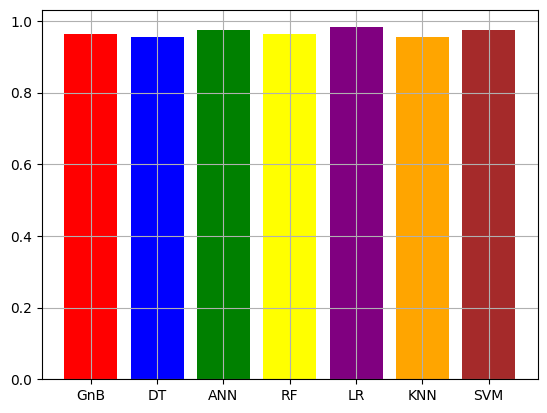

In [77]:
import matplotlib.pyplot as plt

plt.grid(True)
colors=["red","blue","green","yellow","purple","orange","brown"]
plt.bar(title,acc_train,color=colors)
plt.show()

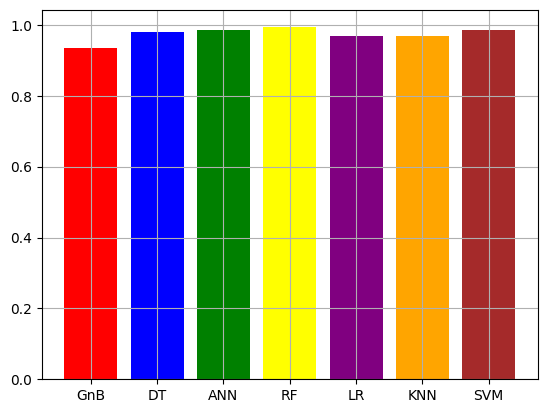

In [78]:
import matplotlib.pyplot as plt
acc_train=[acc_test_gnd,acc_test_dt,acc_test_ann,acc_test_rf,acc_test_lr,acc_test_knn,acc_test_svm]
title=["GnB","DT","ANN","RF","LR","KNN","SVM"]
plt.grid(True)
colors=["red","blue","green","yellow","purple","orange","brown"]
plt.bar(title,acc_train,color=colors)
plt.show()

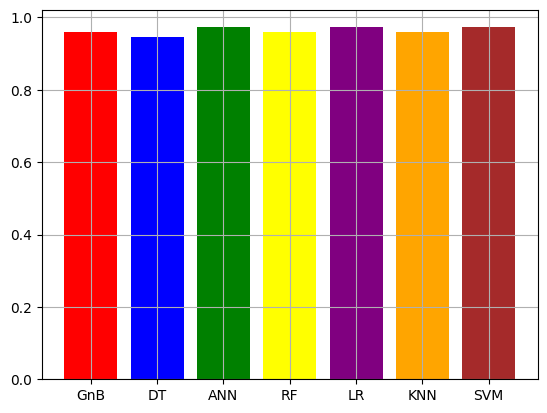

In [79]:
import matplotlib.pyplot as plt
acc_train=[precision_test_gnd,precision_test_dt,precision_test_ann,precision_test_rf,precision_test_lr,precision_test_knn,precision_test_svm]
title=["GnB","DT","ANN","RF","LR","KNN","SVM"]
plt.grid(True)
colors=["red","blue","green","yellow","purple","orange","brown"]
plt.bar(title,acc_train,color=colors)
plt.show()

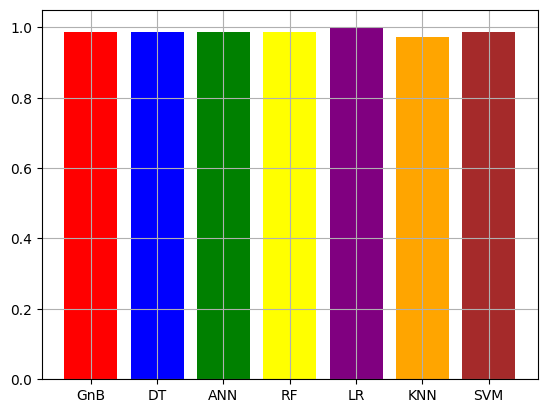

In [80]:
import matplotlib.pyplot as plt
acc_train=[recall_test_gnd,recall_test_dt,recall_test_ann,recall_test_rf,recall_test_lr,recall_test_knn,recall_test_svm]
title=["GnB","DT","ANN","RF","LR","KNN","SVM"]
plt.grid(True)
colors=["red","blue","green","yellow","purple","orange","brown"]
plt.bar(title,acc_train,color=colors)
plt.show()